In [1]:
!pip install xgboost shap utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=008e5b18f14bcfb44649cdde6f7593d595d30765ef0a3058b03a7bb62fc44d6a
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


# Importing Libraries

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
import shap
shap.initjs()
import sys
sys.path.append('../')
import utils


# Loading and Exploring the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/insurance.csv")


In [4]:
print("Number of rows: {}".format(len(data)))

Number of rows: 1338


In [5]:

data.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Feature Engineering

In [6]:
# Convert categorical variables to numeric
data['sex'] = [1 if s == 'male' else 0 for s in data['sex']]
data['smoker'] = [1 if s == 'yes' else 0 for s in data['smoker']]

# One-hot encoding for 'region'
data['region.SW'] = [1 if r == 'southwest' else 0 for r in data['region']]
data['region.SE'] = [1 if r == 'southeast' else 0 for r in data['region']]
data['region.NW'] = [1 if r == 'northwest' else 0 for r in data['region']]
data['region.NE'] = [1 if r == 'northeast' else 0 for r in data['region']]
data = data.drop('region', axis=1)


# Building and Training the Model

An XGBoost regression model is trained to predict the charges column based on the other features.

Text(0.5, 0, 'Actual')

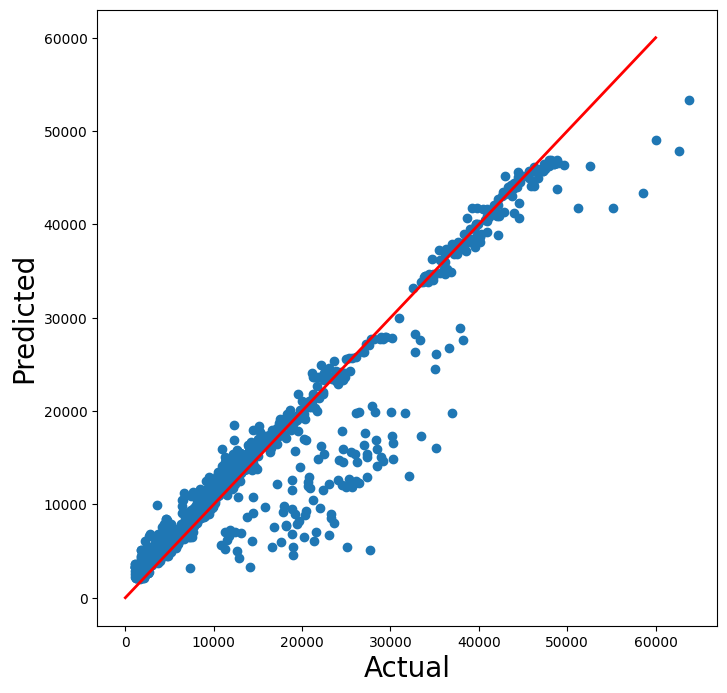

In [7]:
y = data['charges']
X = data.drop('charges', axis=1)

# Train the model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=10)
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Plot actual vs predicted values for evaluation
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(y, y_pred)
plt.plot([0, 60000], [0, 60000], color='r', linestyle='-', linewidth=2)
plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)


# Applying SHAP for Feature Interpretation

## Generating SHAP Values

In [10]:
# Generate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)


## SHAP Bar Plot for Feature Importance

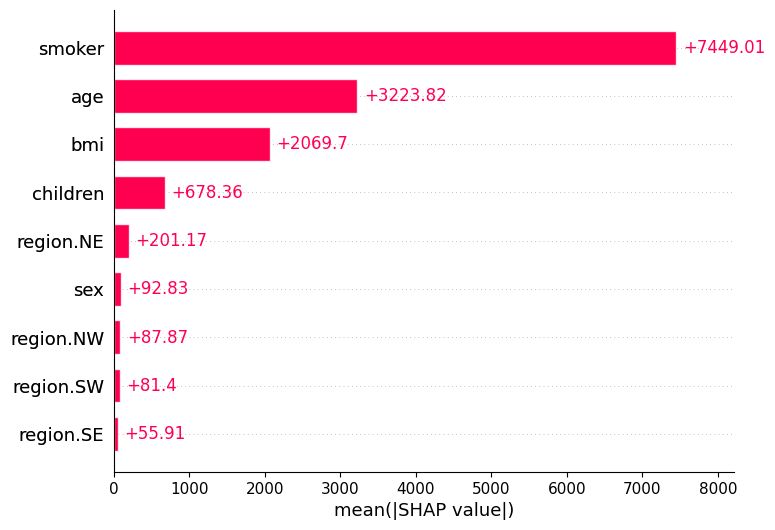

In [11]:
plt.figure(facecolor='white')
shap.plots.bar(shap_values, show=False)
plt.savefig("IN3_shap_0.png", bbox_inches='tight')
plt.show()


## SHAP Waterfall Plot

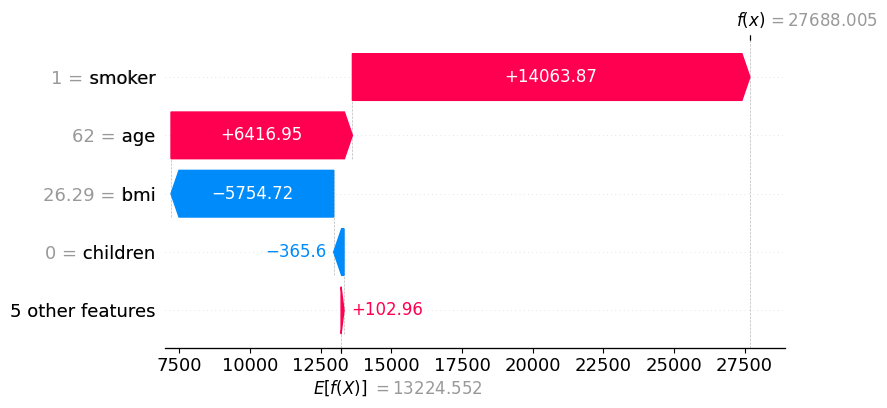

<Figure size 640x480 with 0 Axes>

In [12]:
shap.plots.waterfall(shap_values[11], max_display=5)
plt.savefig("IN3_shap_1.png", bbox_inches='tight')
plt.show()


## SHAP Scatter Plot (Dependence Plot)

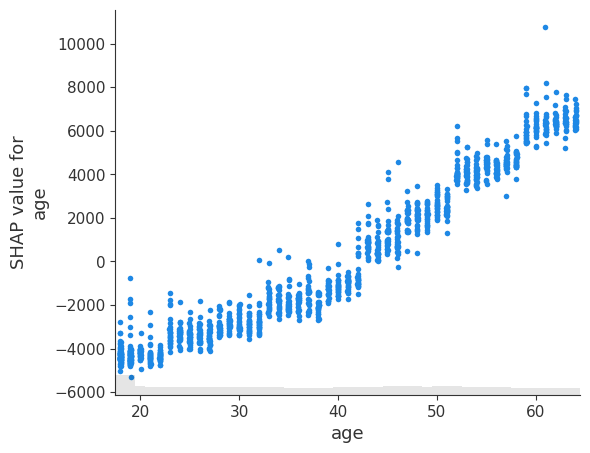

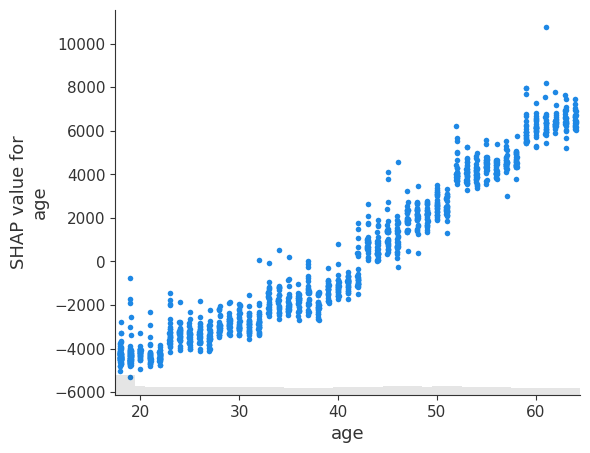

In [13]:
shap.plots.scatter(shap_values[:,"age"], show=False)
shap.plots.scatter(shap_values[:,"age"], show=False)


##  Second Observation with Waterfall Plot

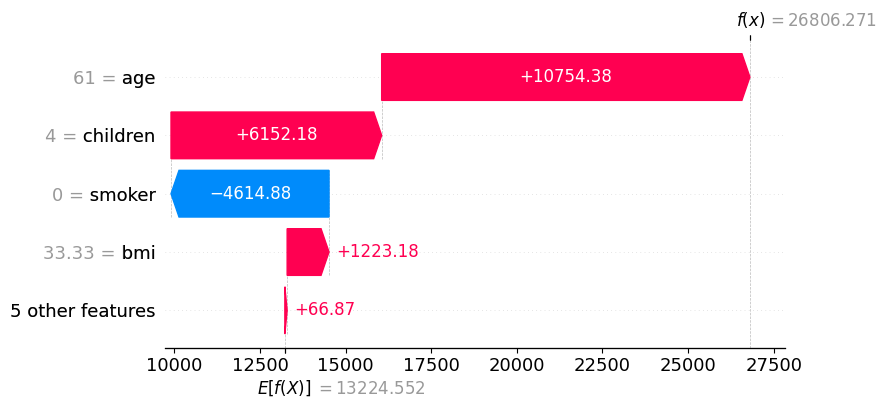

In [14]:
shap.plots.waterfall(shap_values[1012], max_display=5, show=False)
plt.savefig("IN3_shap_2.png", bbox_inches='tight')
plt.show()
